## Initial Prediction Model
The original README file says:
> Often, more than one contact to the same client was required, **in order to access if the product (bank term deposit) would be (or not) subscribed**

Therefore, let's start with a simple binary classification model to predict Deposit yes/no

In [10]:
#import the right libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import f1_score, classification_report, accuracy_score, log_loss, roc_auc_score, hamming_loss, fbeta_score, auc, roc_curve, precision_score, recall_score
from sklearn.model_selection import cross_val_predict, cross_val_score, learning_curve, GridSearchCV, RandomizedSearchCV, StratifiedShuffleSplit, train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder, RobustScaler, MinMaxScaler
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

In [11]:
#this option just allwos us to see every column in the notebook
pd.set_option('display.max_columns', None)

#pd.get_option("display.max_columns")

In [12]:
#pull in the dataset and turn into a DataFrame
bank_main_df = pd.read_csv('./Dataset_1_Bank Marketing/bank_marketing.csv',delimiter=';')
# bank_main_df

In [13]:
# bank_main_df.describe()

In [14]:
#checking the options available under the "deposit" field
# bank_main_df['deposit'].value_counts()

In [15]:
#replacing the yes/no categorical values with 1/0 binary digits
bank_main_df['deposit'] = [1 if (bank_main_df['deposit'][i] == 'yes') else 0 for i in range(len(bank_main_df)) ]

In [16]:
#because we have so many cateogrical variables, we should one-hot encode them (i.e. create dummy categorical variables)
#we also use drop_first=True to reduce the redundant column count 
bank_main_df = pd.get_dummies(bank_main_df, drop_first=False)

# bank_main_df

In [17]:
#note that only the "age" category has null values

# pd.isnull(bank_main_df).sum()

# Imputing the missing values in "Age" variable 

* **Iterative Imputer:**
Multivariate imputer that estimates each feature from all the others. A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

In [18]:
# Use multivariate imputer that estimates and imputes null values based on all the others. 

imp = IterativeImputer(max_iter=10, verbose=0) # values passed are defaults, but added them because they seem important... play around
imp.fit(bank_main_df)
imputed_df = imp.transform(bank_main_df)
imputed_df = pd.DataFrame(imputed_df, columns=bank_main_df.columns)

In [19]:
# pd.isnull(imputed_df).sum()

# R-Forest Feature Importance

In [21]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(imputed_df)

X = imputed_df.drop(columns='deposit')
y = imputed_df['deposit']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=True, random_state=42) 

0.9062960778531407
('age', 0.091)
('balance', 0.091)
('day', 0.079)
('duration', 0.264)
('campaign', 0.038)
('pdays', 0.039)
('previous', 0.021)
('job_admin.', 0.009)
('job_blue-collar', 0.008)
('job_entrepreneur', 0.004)
('job_housemaid', 0.003)
('job_management', 0.01)
('job_retired', 0.005)
('job_self-employed', 0.005)
('job_services', 0.006)
('job_student', 0.004)
('job_technician', 0.01)
('job_unemployed', 0.004)
('job_unknown', 0.001)
('marital_divorced', 0.007)
('marital_married', 0.01)
('marital_single', 0.01)
('education_primary', 0.007)
('education_secondary', 0.012)
('education_tertiary', 0.011)
('education_unknown', 0.005)
('default_no', 0.005)
('default_yes', 0.002)
('housing_no', 0.012)
('housing_yes', 0.015)
('loan_no', 0.007)
('loan_yes', 0.007)
('contact_cellular', 0.011)
('contact_telephone', 0.005)
('contact_unknown', 0.009)
('month_apr', 0.014)
('month_aug', 0.01)
('month_dec', 0.004)
('month_feb', 0.008)
('month_jan', 0.005)
('month_jul', 0.008)
('month_jun', 0.01)

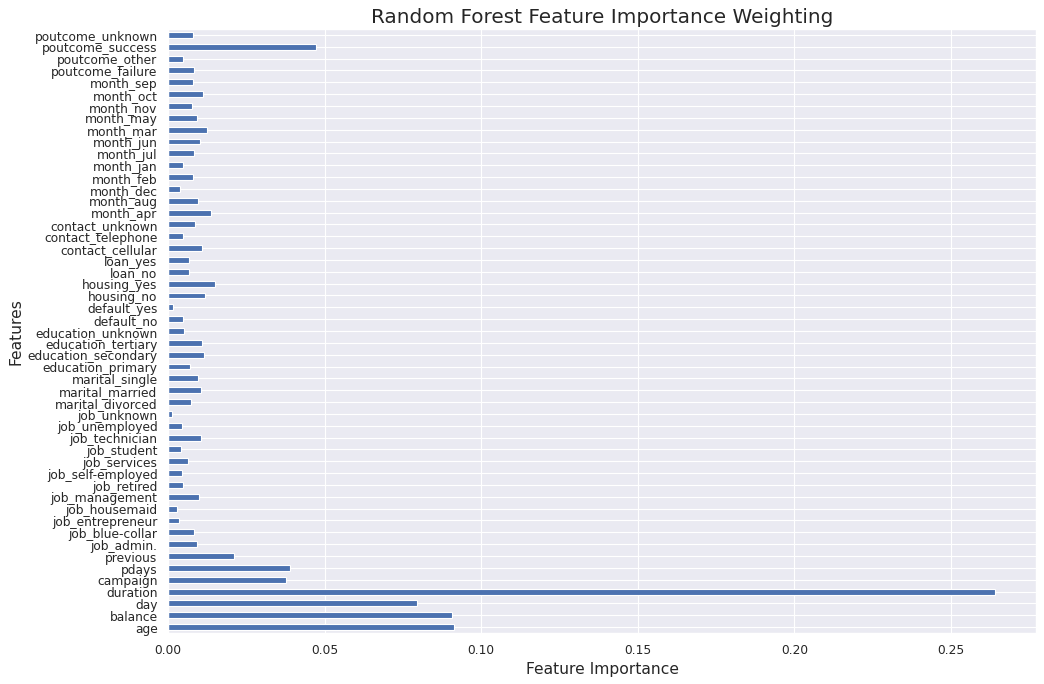

In [33]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(imputed_df)

X = imputed_df.drop(columns='deposit')
y = imputed_df['deposit']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=True, random_state=42) 

clf = RandomForestClassifier()
# fit the classifier to the training set
clf.fit(X_train, y_train)
# predict on the test set
y_pred = clf.predict(X_test)
acc_ = accuracy_score(y_test, y_pred)
print(acc_)

for feature in zip(X.columns, clf.feature_importances_.round(3)):
    print(feature)

# visualize feature importance
with plt.style.context('ggplot', ):
    sns.set(font_scale=1)
    plt.figure(num=None, figsize=(14,10), dpi=80, facecolor='w')
    plt.title("Random Forest Feature Importance Weighting", size=18)
    plt.ylabel('Features', size = 14)
    plt.xlabel('Feature Importance', size=14)
    feat_importances = pd.Series(clf.feature_importances_, index= X.columns)
    
    
# feat_importances.nlargest(5).plot(kind='barh')
    feat_importances.plot(kind='barh')

plt.savefig('test.png', bbox_inches='tight')

In [32]:
print(feature)

('poutcome_unknown', 0.01)


# Loop through all classifiers

In [12]:
# StandardScaler, MinMaxScaler, RobustScaler
scaler = RobustScaler() 
X_scaled = scaler.fit_transform(imputed_df)

X = imputed_df.drop(columns='deposit')
y = imputed_df['deposit']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=True)

In [13]:

classifiers = [
#     MultinomialNB(), # doesn't work
    KNeighborsClassifier(3), # works
#     SVC(kernel="rbf", C=0.001, probability=True), # took a long time... need to refresh memory
#     SVC(kernel='linear'), # took a long time... need to refresh memory
#     NuSVC(probability=True, nu=0.1), # took a long time... need to refresh memory
    DecisionTreeClassifier(), # works
    RandomForestClassifier(), # works
    AdaBoostClassifier(), # works
    GradientBoostingClassifier(), # works
    GaussianNB(), # works
    BernoulliNB(), # works
    MLPClassifier(), # works
    MLPClassifier(hidden_layer_sizes=[100, 100]), # works
    LinearDiscriminantAnalysis(), # works
    LogisticRegression(), # works
    QuadraticDiscriminantAnalysis(), # works
]

log_cols=["Classifier", "Accuracy", "F1 Score", "ROC", "Precision", "Recall", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
#     y_pred = clf.predict(X)
    name = clf.__class__.__name__

    print("="*30)
    print(name)
    print('****Results****')

    train_predictions = clf.predict(X_test)
    acc_ = accuracy_score(y_test, train_predictions)
    acc = acc_.round(3)
    print("Accuracy: {:.4%}".format(acc))

#     coef_scores = X_scaled
#     coef_scores = clf.coef_
#     print(coef_scores)

    fbeta_ = fbeta_score(y_test, train_predictions, beta=1)
    fbeta = fbeta_.round(3)
    print("F1 Score: {}".format(fbeta))

    roc_ = roc_auc_score(y_test, train_predictions)
    roc = roc_.round(3)
    print("AUC (ROC) Score: {}".format(roc))

    precision_ = precision_score(y_test, train_predictions, average='binary')
    precision = precision_.round(3)
    print("Precision Score: {}".format(precision))

    recall_ = recall_score(y_test, train_predictions)
    recall = recall_.round(3)
    print("Recall Score: {}".format(recall))

#     train_predictions = clf.predict_proba(X_test)
    ll_ = log_loss(y_test, train_predictions)
    ll = ll_.round(3)
#     print("Log Loss: {}".format(ll))

    log_entry = pd.DataFrame([[name, acc*100, fbeta, roc, precision, recall, ll]], columns=log_cols)
    log = log.append(log_entry)

# print("="*30)
# type(coef_scores)
# print(index)
# print(log_entry)
# type(log)

KNeighborsClassifier
****Results****
Accuracy: 87.4000%
F1 Score: 0.343
AUC (ROC) Score: 0.617
Precision Score: 0.435
Recall Score: 0.283


<ipython-input-13-bc12ea19ccdd>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


DecisionTreeClassifier
****Results****
Accuracy: 86.8000%
F1 Score: 0.447
AUC (ROC) Score: 0.69
Precision Score: 0.436
Recall Score: 0.458


<ipython-input-13-bc12ea19ccdd>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


RandomForestClassifier
****Results****
Accuracy: 90.6000%
F1 Score: 0.502
AUC (ROC) Score: 0.69
Precision Score: 0.653
Recall Score: 0.408


<ipython-input-13-bc12ea19ccdd>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


AdaBoostClassifier
****Results****
Accuracy: 90.0000%
F1 Score: 0.469
AUC (ROC) Score: 0.673
Precision Score: 0.618
Recall Score: 0.378


<ipython-input-13-bc12ea19ccdd>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


GradientBoostingClassifier
****Results****
Accuracy: 90.5000%
F1 Score: 0.505
AUC (ROC) Score: 0.693
Precision Score: 0.644
Recall Score: 0.416
GaussianNB
****Results****
Accuracy: 85.1000%
F1 Score: 0.452
AUC (ROC) Score: 0.711
Precision Score: 0.395
Recall Score: 0.529
BernoulliNB
****Results****
Accuracy: 84.1000%
F1 Score: 0.372
AUC (ROC) Score: 0.652
Precision Score: 0.344
Recall Score: 0.405


<ipython-input-13-bc12ea19ccdd>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
<ipython-input-13-bc12ea19ccdd>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
<ipython-input-13-bc12ea19ccdd>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


MLPClassifier
****Results****
Accuracy: 82.5000%
F1 Score: 0.501
AUC (ROC) Score: 0.795
Precision Score: 0.375
Recall Score: 0.756


<ipython-input-13-bc12ea19ccdd>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


MLPClassifier
****Results****
Accuracy: 86.2000%
F1 Score: 0.523
AUC (ROC) Score: 0.769
Precision Score: 0.438
Recall Score: 0.648


<ipython-input-13-bc12ea19ccdd>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


LinearDiscriminantAnalysis
****Results****
Accuracy: 89.9000%
F1 Score: 0.5
AUC (ROC) Score: 0.697
Precision Score: 0.591
Recall Score: 0.434


<ipython-input-13-bc12ea19ccdd>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


LogisticRegression
****Results****
Accuracy: 89.0000%
F1 Score: 0.319
AUC (ROC) Score: 0.6
Precision Score: 0.576
Recall Score: 0.221
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 87.2000%
F1 Score: 0.457
AUC (ROC) Score: 0.694
Precision Score: 0.453
Recall Score: 0.462


C:\Users\trevor.sauerbrey\WPy64-3890\python-3.8.9.amd64\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-13-bc12ea19ccdd>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\trevor.sauerbrey\WPy64-3890\python-3.8.9.amd64\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
<ipython-input-13-bc12ea19ccdd>:63: FutureWarning: The frame.app

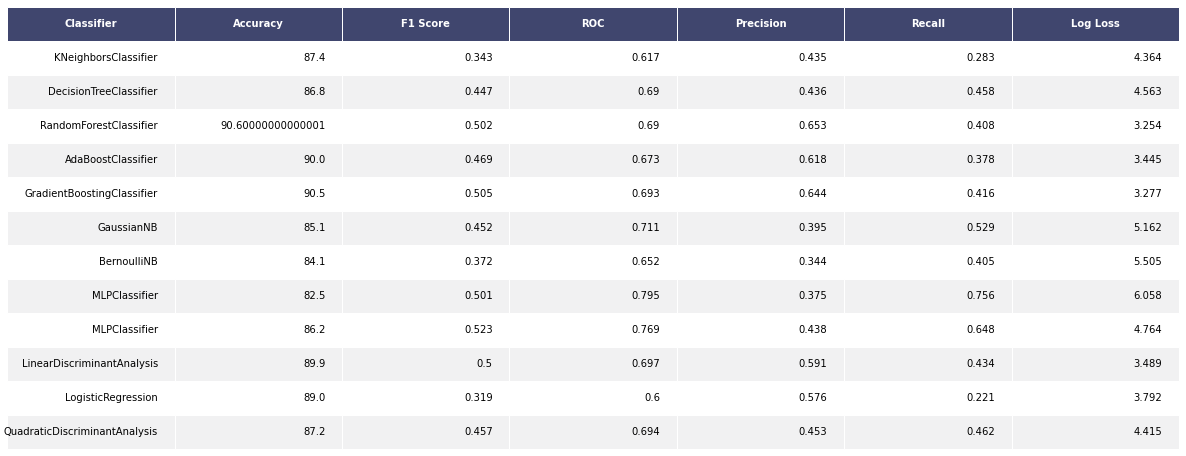

In [14]:
# Save DF as PNG
def render_mpl_table(imputed_df, col_width=6.0, row_height=0.625, font_size=10,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(imputed_df.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=imputed_df.values, bbox=bbox, colLabels=imputed_df.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

fig,ax = render_mpl_table(log, header_columns=0, col_width=3.0)
fig.savefig("table_mpl.png")

### Setting up Logistic Regression

Reference for multi linear regression:

https://medium.com/swlh/multi-linear-regression-using-python-44bd0d10082d

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
#set up the X matrix and y target variable
X = imputed_df.drop(columns='deposit')
y = imputed_df['deposit']

#split the data appropriately into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=True)

In [19]:
#instantiate scaler and LogisticRegression model
sc = StandardScaler()
logreg = LogisticRegression()

#fit/transform the X_train and X_test datasets
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

#train the logreg model
logreg.fit(X_train_sc, y_train)

LogisticRegression()

In [20]:
#score the model
print(f"Train score: {logreg.score(X_train_sc,y_train)}")
print(f"Test score: {logreg.score(X_test_sc,y_test)}")

Train score: 0.9020444275918729
Test score: 0.9009879091713359


In [21]:
#for the test dataset, make predictions for the target variable
y_preds = logreg.predict(X_test_sc)

In [22]:
print(f"Confusion matrix so we can find Type I / Type II errors:\n{confusion_matrix(y_true=y_test, y_pred=y_preds)}")

Confusion matrix so we can find Type I / Type II errors:
[[11662   290]
 [ 1053   559]]


In [23]:
print("Here is a classification report, based on the confusion matrix")
print(classification_report(y_true=y_test,y_pred=y_preds))

Here is a classification report, based on the confusion matrix
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     11952
         1.0       0.66      0.35      0.45      1612

    accuracy                           0.90     13564
   macro avg       0.79      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



C:\Users\trevor.sauerbrey\WPy64-3890\python-3.8.9.amd64\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


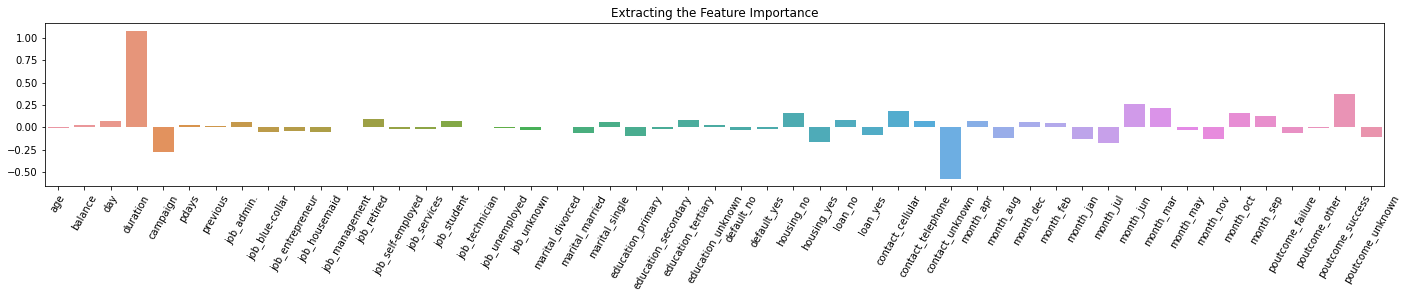

In [24]:
plt.figure(figsize=(24,3))
sns.barplot(X.columns,logreg.coef_[0])
plt.xticks(rotation=60)
plt.title("Extracting the Feature Importance");

### Further discussion for the group
* **What further refinements to the dataset should we make as part of the EDA / cleanup?**
    * Removing the *pdays* variable, for example
    * Dropping outliers 
* **How might the use of other classification algorithms and scalers affect the final predictions?**
    * ~Algorithms like LogisticRegression, DecisionTree, RandomForest, Kneighbors, NaiveBayes, neural net, etc.~
    * Scalers like StandardScaler, MinMaxScaler, RobustScaler
    * PCA (principal component analysis) to reduce dimensions
* **Playing with parameters, pipelines, gridsearches to maximize True Negatives and minimize False Negatives**
    * That is, maximize deposit==1 correct predictions and reducing deposit==0 wrong predictions
    * Even if that means accidentally overpredicting the number of true deposits, better to try a bad path than miss a potential business opportunity
* **Extending this to other predictions**
    * e.g. predicting the "default" variable, or some other classification
    * e.g. predicting a range for continuous values based on categorical values
* **Best ways to impute missing data?**
    * 